# 1. Chargement des données

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

C:\Users\Samy\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
df_patient = pd.read_csv('df_patient.csv',sep=';')
df_pcr = pd.read_csv('df_pcr.csv',sep=';')

In [3]:
pd.set_option('display.max_rows', 50)
pd.set_option('display.max_columns', 100)
pd.set_option('display.width', 1000)

Avant de faire une jointure entre df_patient et df_pcr, nous affectons comme index à df_patient et df_pcr la colonne de jointure `patient_id`, car un join par index est 5 à 10 fois plus rapide qu'un join sur une colonne simple.

In [4]:
df_patient = df_patient.set_index(df_patient['patient_id']).drop(['patient_id'],axis=1)
df_pcr = df_pcr.set_index(df_pcr['patient_id']).drop(['patient_id'],axis=1)

In [5]:
df_patient = df_patient.join(df_pcr,how='left').reset_index()
df_patient

,patient_id,given_name,surname,street_number,address_1,suburb,postcode,state,date_of_birth,age,phone_number,address_2,pcr
0,100005,kiana,halley,46.0,mccann street,undercliffe,4210.0,vic,1963-01-18,32.0,07 32322867,NaN,NaN
1,100015,michael,mcvicar,153.0,mountain circuit,wendouree,3338.0,nsw,1978-09-18,27.0,08 55502793,NaN,NaN
2,100037,ella,clarke,91.0,NaN,oyster bay,4208.0,vic,1980-04-22,36.0,08 45736238,NaN,N
3,100064,alexandra,jeffries,9.0,barlow street,joondanna,2617.0,vic,1902-07-24,37.0,08 47796510,NaN,NaN
4,100126,jayden,clarke,6.0,pennefather street,orange,2904.0,qld,1918-12-10,29.0,03 27525454,lachlan view,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18940,999607,joshua,ryan,105.0,tanumbirini street,mirrabooka,5109.0,sa,1999-02-19,29.0,08 45059414,nareen gardens hostel,NaN
18941,999684,charlie,hendricks,32.0,david street,yass,4740.0,sa,1935-11-11,29.0,NaN,NaN,NaN
18942,999751,kierra,godfrey,262.0,macarthur avenue,st ives,3356.0,qld,1949-07-22,19.0,03 61193186,NaN,NaN
18943,999885,mhary,ulrick,13.0,sonder close,clayton,4744.0,vic,1931-05-09,89.0,07 14497722,NaN,N


# 2. Analyse exploratoire des données

Nous allons d'abord nous intéresser aux variables prises une à une (analyse univariée) afin d'avoir des insights sur la distribution, fréquence, valeurs extrêmes etc... de chaque attribut sans inclure la variable `pcr`. Puis nous allons nous intéresser à la relation entre les différentes variables et la maladie (analyse bivariée).

## a. Analyse univariée

Nous allons d'abord réaliser une analyse individuelle pour chaque colonne.

- **given_name :**

Comme il y'a plus d'un millier de prénoms uniques, nous affichons les 30 prénoms les plus communs pour une question de lisibilité :

<AxesSubplot:xlabel='index', ylabel='given_name'>

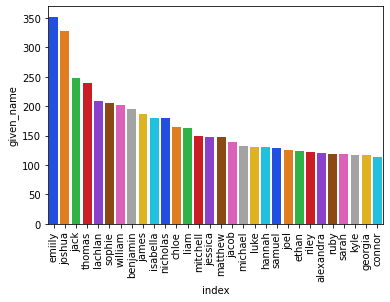

In [6]:
name_barplot = sns.barplot(data=df_patient['given_name'].value_counts()[:30].reset_index(),x='index',y='given_name',palette='bright')
name_barplot.set_xticklabels(name_barplot.get_xticklabels(),rotation=90)
name_barplot

Les prénoms les plus courants sont `emiily`, `joshua` avec plus de 300 occurences , ensuite `jack` et `thomas` avec presque 250 occurences.

- **surname :**

Même chose pour les noms de familles, nous affichons uniquement les 30 noms les plus communs.

<AxesSubplot:xlabel='index', ylabel='surname'>

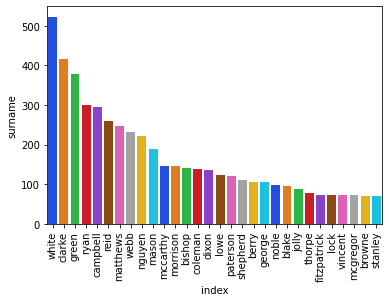

In [7]:
surname_barplot = sns.barplot(data=df_patient['surname'].value_counts()[:30].reset_index(),x='index',y='surname',palette='bright')
surname_barplot.set_xticklabels(surname_barplot.get_xticklabels(),rotation=90)
surname_barplot

Les noms de familles les plus communs sont `white` avec plus de 500 occurences, suivis de `clarke` et `green` avec à peu près 400 occurences.

- **street_number :**

Nous commençons d'abord par afficher un boxplot :

<AxesSubplot:ylabel='street_number'>

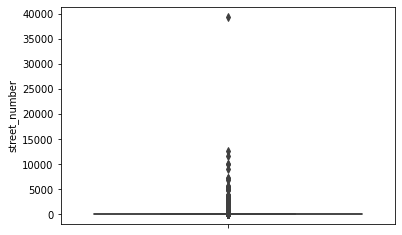

In [8]:
sns.boxplot(df_patient['street_number'],orient='v')

Nous remarquons une valeur de numéro de rue très éloignée du reste des numéros de rue, ainsi que plusieurs autres valeurs extrêmes. Pour une meilleur perception du boxplot, nous éliminons les valeurs extrêmes :

<AxesSubplot:ylabel='street_number'>

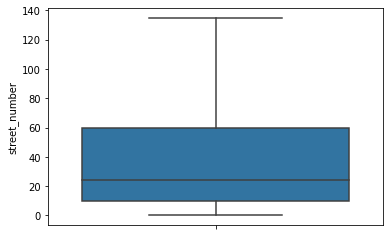

In [9]:
sns.boxplot(df_patient['street_number'],orient='v',showfliers=False)

Nous pouvons voir que la valeur médiane est à peu près 25, que le premier quartile est à environ 10, et le 3ème quartile à 60. Nous vérifions cela manuellement :

In [10]:
np.median(df_patient['street_number'].dropna().values)

24.0

In [11]:
np.quantile(df_patient['street_number'].dropna().values,q=0.25)

10.0

In [12]:
np.quantile(df_patient['street_number'].dropna().values,q=0.75)

60.0

In [13]:
np.mean(df_patient['street_number'].dropna().values)

79.98492110506758

Si nous regardons plutôt la distribution avec un histogramme, il est clair que nous allons avoir un graphe avec la plupart des valeurs à gauche :

<AxesSubplot:xlabel='street_number'>

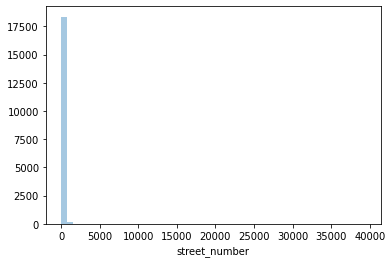

In [14]:
sns.distplot(df_patient['street_number'].dropna(),kde=False)

- **address_1 :**

Comme il y'a plus de 4000 adresses uniques, nous affichons les 30 adresses les plus communs pour une question de lisibilité :

<AxesSubplot:xlabel='index', ylabel='address_1'>

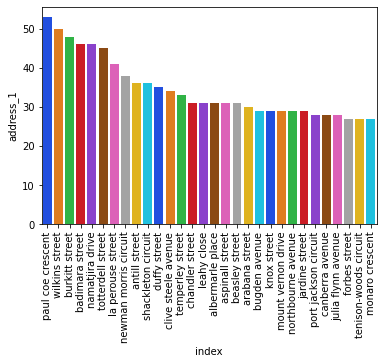

In [15]:
address1_barplot = sns.barplot(data=df_patient['address_1'].value_counts()[:30].reset_index(),x='index',y='address_1',palette='bright')
address1_barplot.set_xticklabels(address1_barplot.get_xticklabels(),rotation=90)
address1_barplot

Les adresses les plus courantes sont `paul coe crescent`, `wilkins street` et `burkitt street` avec à peu près 50 occurences.

Nous allons maintenant essayer de visualiser ces adresses sur une carte, mais avant nous devons acquérir leur données de géolocalisation (latitude et longitude).<br/>
Nous utilisons pour cela Nominatim qui nous permet de réaliser des requête avec une adresses et nous retourne les données de géolocalisation :

In [16]:
from  geopy.geocoders import Nominatim
geolocator = Nominatim(user_agent='samyArabiGeocoder')

Nous créons ensuite notre fonction qui étant donné une adresse, retourne sa latitude+longitude, ou bien nan si l'adresse donnée n'existe pas.

In [17]:
def get_geolocalisation_from_address(address):
    if pd.isna(address):
        return [np.nan,np.nan]
    country ="Australia"
    loc = geolocator.geocode(address+','+ country)
    if loc==None:
        return [np.nan,np.nan]
    else:
        return [loc.latitude,loc.longitude]

Pour des soucis de temps de requête et de limitation du nombre de requête par le framework Nominatim, nous allons uniquement réccupérer les données de géolocalisation des adresses les plus occurentes :

In [18]:
most_common_addresses = df_patient['address_1'].value_counts()[:100].reset_index().rename({'address_1':'count','index':'address_1'},axis=1)
most_common_addresses

,address_1,count
0,paul coe crescent,53
1,wilkins street,50
2,burkitt street,48
3,badimara street,46
4,namatjira drive,46
...,...,...
95,dixon drive,18
96,davidson street,18
97,freda bennett circuit,18
98,antis street,18


Puis nous réccupérons la géolocalisation de ces adresses :

In [19]:
addresses_loc = [get_geolocalisation_from_address(a) for a in most_common_addresses['address_1']]
addresses_loc

[[-35.1762308, 149.1196407],
 [-33.9173801, 150.8360177],
 [-27.240962, 153.0401134],
 [-35.3585538, 149.0602286],
 [-27.6065514, 152.8699943],
 [-35.2357939, 149.0601853],
 [-33.7950461, 151.2702586],
 [-35.4038705, 149.0782153],
 [-35.2465272, 149.1557058],
 [-35.36604055, 149.1029707707899],
 [-33.8378242, 150.9654461],
 [-35.4227181, 149.0892836],
 [-35.1864177, 149.0927022],
 [-28.8691266, 151.1678785],
 [-35.3432014, 149.1408566],
 [-35.3472503, 149.0969591],
 [-27.6184652, 152.7320436],
 [-35.3719078, 149.0913482],
 [-35.2548291, 149.0847975],
 [-28.8404276, 153.4387827],
 [-33.876781, 151.2421013],
 [-35.3889863, 149.0324743],
 [-35.2482478, 149.1342822],
 [-27.6192249, 152.727592],
 [-35.34710675, 149.09359245460575],
 [-35.3441397, 149.1903712],
 [-35.3643319, 149.1106977],
 [-32.7545683, 148.6475668],
 [-35.4252562, 149.0775613],
 [-27.3997796, 152.9389711],
 [-35.2916655, 149.1509447],
 [-33.9611481, 151.2443375],
 [-35.3879389, 149.0465333],
 [-33.7366055, 151.2624293],
 [

Enfin, nous ajoutons ces données à notre dataframe :

In [20]:
most_common_addresses['latitude'] = [x[0] for x in addresses_loc]
most_common_addresses['longitude'] = [x[1] for x in addresses_loc]
most_common_addresses

,address_1,count,latitude,longitude
0,paul coe crescent,53,-35.176231,149.119641
1,wilkins street,50,-33.917380,150.836018
2,burkitt street,48,-27.240962,153.040113
3,badimara street,46,-35.358554,149.060229
4,namatjira drive,46,-27.606551,152.869994
...,...,...,...,...
95,dixon drive,18,-23.896846,151.247277
96,davidson street,18,-26.617315,152.951417
97,freda bennett circuit,18,-35.180346,149.105514
98,antis street,18,-35.345953,149.095555


Nous allons maintenant utiliser le package folium afin d'afficher ces données sur une carte :

In [21]:
import folium

In [22]:
m = folium.Map(location=[-25.7826082, 132.8062299],zoom_start=4.4)
m

Nous ajoutons ensuite les adresses sur la carte :

In [23]:
most_common_addresses.apply(lambda x:folium.CircleMarker(location=[x["latitude"], x["longitude"]],fill=True).add_to(m), axis=1)
m

Nous remarquons que la plupart des patients vivent dans la partie Est et Sud Est de l'Australie.

- **suburb :**

Même chose que pour l'adresse, nous commençons par afficher les banlieues les plus communes dans le dataset :

<AxesSubplot:xlabel='index', ylabel='suburb'>

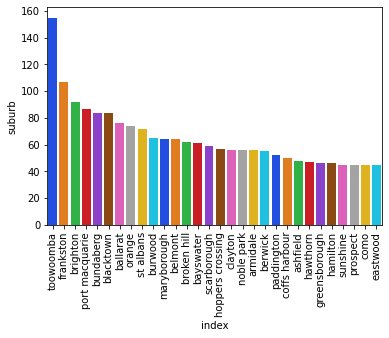

In [24]:
suburb_barplot = sns.barplot(data=df_patient['suburb'].value_counts()[:30].reset_index(),x='index',y='suburb',palette='bright')
suburb_barplot.set_xticklabels(suburb_barplot.get_xticklabels(),rotation=90)
suburb_barplot

On peut voir que la plupart des patients vivent à `toowoomba`, `frankston` et `brighton`. Nous impémentons une fonction qui permet d'avoir les données de géolocalisation à partir du nom de la banlieue :

In [25]:
def get_geolocalisation_from_suburb(suburb):
    if pd.isna(suburb):
        return [np.nan,np.nan]
    country ="Australia"
    loc = geolocator.geocode(suburb+','+ country)
    if loc==None:
        return [np.nan,np.nan]
    else:
        return [loc.latitude,loc.longitude]

Nous créons d'abord notre dataframe qui contient les banlieus les plus occurentes :

In [26]:
most_common_suburbs = df_patient['suburb'].value_counts()[:100].reset_index().rename({'suburb':'count','index':'suburb'},axis=1)
most_common_suburbs

,suburb,count
0,toowoomba,155
1,frankston,107
2,brighton,92
3,port macquarie,87
4,bundaberg,84
...,...,...
95,camp hill,31
96,vermont,31
97,kingsford,30
98,deer park,30


Puis, de la même manière qu'avec l'adresse. Nous réccupérons les données de géolocalisation de ces banlieues :

In [27]:
suburb_loc = [get_geolocalisation_from_suburb(a) for a in most_common_suburbs['suburb']]
suburb_loc

[[-27.5610193, 151.953351],
 [-38.150634999999994, 145.14244286734106],
 [-37.9081962, 144.9957991],
 [-31.4299499, 152.9103525],
 [-24.8653253, 152.3516785],
 [-33.7401885, 150.86483553289474],
 [-37.5622632, 143.8607215],
 [-33.2820463, 149.0971567],
 [-37.7445766, 144.79970234688483],
 [-33.8858088, 151.10248109002006],
 [-25.537583, 152.7019182],
 [-33.0331697, 151.6585586],
 [-31.965, 141.4511111],
 [-37.8413656, 145.2677624],
 [-31.8959841, 115.7592114],
 [-37.88325, 144.7011019],
 [-37.9173212, 145.1304242],
 [-37.9663213, 145.1758464],
 [-30.5144881, 151.6656564],
 [-38.0396628, 145.3449342],
 [-33.8841572, 151.2272766],
 [-30.2962407, 153.1135293],
 [-33.8894781, 151.1274125],
 [-37.8244246, 145.0317207],
 [-37.7040276, 145.1082164336504],
 [-37.742187200000004, 142.02170675809265],
 [-37.788095299999995, 144.83260045],
 [-34.8847056, 138.60136553641638],
 [-34.0032179, 151.0631257],
 [-33.79, 151.0844444],
 [-37.8159197, 145.2289042],
 [-37.8638261, 144.981637],
 [-37.662922,

Nous ajoutons ensuite ces informations à notre dataframe :

In [28]:
most_common_suburbs['latitude'] = [x[0] for x in suburb_loc]
most_common_suburbs['longitude'] = [x[1] for x in suburb_loc]
most_common_suburbs

,suburb,count,latitude,longitude
0,toowoomba,155,-27.561019,151.953351
1,frankston,107,-38.150635,145.142443
2,brighton,92,-37.908196,144.995799
3,port macquarie,87,-31.429950,152.910352
4,bundaberg,84,-24.865325,152.351678
...,...,...,...,...
95,camp hill,31,-27.494239,153.077193
96,vermont,31,-37.838462,145.199347
97,kingsford,30,-33.921592,151.227231
98,deer park,30,-37.768660,144.771308


Enfin, nous les affichons sur une carte :

In [29]:
m = folium.Map(location=[-25.7826082, 132.8062299],zoom_start=4.4)
most_common_suburbs.apply(lambda x:folium.CircleMarker(location=[x["latitude"], x["longitude"]],fill=True,color='red').add_to(m), axis=1)
m

Les résultats sont assez similaire à tout à l'heure, avec quelques banlieues qui apparaissent au sud de l'Australie cette fois, et une très grande concentration de patients dans la ville de `Melbourne` et `Sydney`

- **postcode :**

Nous affichons d'abord un boxplot :

<AxesSubplot:ylabel='postcode'>

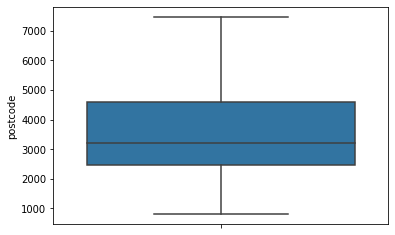

In [30]:
sns.boxplot(df_patient['postcode'].dropna(),orient='v')

La plupart des postcodes sont entre 1000 et 7500 (approximativement), il n'y a pas de valeurs extrêmes, ce qui veut dire que nous n'avons à priori pas de code postal erroné.

Sous forme d'histogramme :

<AxesSubplot:xlabel='postcode'>

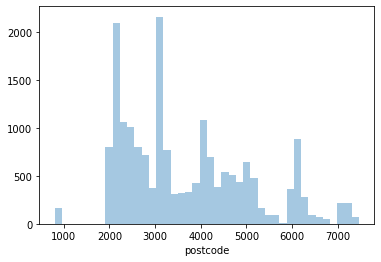

In [31]:
sns.distplot(df_patient['postcode'].dropna(),kde=False)

- **state :**

Même chose que pour l'adresse, nous commençons par afficher les états les plus communs dans le dataset (Sans prendre en considération les états qui apparaissent moins de 5 fois, qui sont probablement des typos) :

In [32]:
most_common_states = df_patient['state'].value_counts().reset_index().rename({'state':'count','index':'state'},axis=1)
most_common_states = most_common_states[most_common_states['count']>5]
most_common_states

,state,count
0,nsw,5817
1,vic,4129
2,qld,3335
3,wa,1513
4,sa,1333
5,tas,473
6,act,241
7,nt,131


<AxesSubplot:xlabel='state', ylabel='count'>

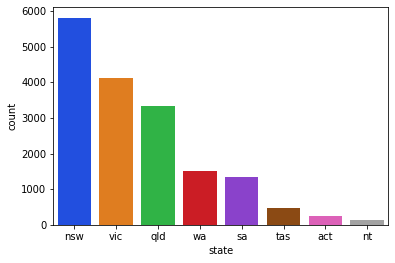

In [33]:
state_barplot = sns.barplot(data=most_common_states,x='state',y='count',palette='bright')
state_barplot

Les états `nsw`,`vic` et `qld` sont les plus occurents.

De la même manière qu'avec l'adresse, nous réccupérons la géolocalisation de ces états :

In [34]:
def get_geolocalisation_from_state(state):
    if pd.isna(state):
        return [np.nan,np.nan]
    country ="Australia"
    loc = geolocator.geocode(state+','+ country)
    if loc==None:
        return [np.nan,np.nan]
    else:
        return [loc.latitude,loc.longitude]

In [35]:
state_loc = [get_geolocalisation_from_state(a) for a in most_common_states['state']]
state_loc

[[-31.8759835, 147.2869493],
 [-36.5986096, 144.6780052],
 [-22.1646782, 144.5844903],
 [-25.2303005, 121.0187246],
 [-30.5343665, 135.6301212],
 [-42.035067, 146.6366887],
 [-35.4883502, 149.0026942],
 [-19.8516101, 133.2303375]]

In [36]:
most_common_states['latitude'] = [x[0] for x in state_loc]
most_common_states['longitude'] = [x[1] for x in state_loc]
most_common_states

,state,count,latitude,longitude
0,nsw,5817,-31.875984,147.286949
1,vic,4129,-36.598610,144.678005
2,qld,3335,-22.164678,144.584490
3,wa,1513,-25.230300,121.018725
4,sa,1333,-30.534367,135.630121
5,tas,473,-42.035067,146.636689
6,act,241,-35.488350,149.002694
7,nt,131,-19.851610,133.230337


Et enfin nous les affichons sur une carte :

In [37]:
m = folium.Map(location=[-25.7826082, 132.8062299],zoom_start=4.4)
most_common_states.apply(lambda x:folium.CircleMarker(location=[x["latitude"], x["longitude"]],fill=True,color='green',radius=x['count']/max(most_common_states['count'])*50).add_to(m), axis=1)
m

Nous pouvons voir que la plupart des patients sont des états qui se situent à l'est de l'Australie

- **age :**

Comme l'age est déduit de la date de naissance, nous préférons travailler avec la variable âge.

Nous affichons d'abord un boxplot :

<AxesSubplot:ylabel='age'>

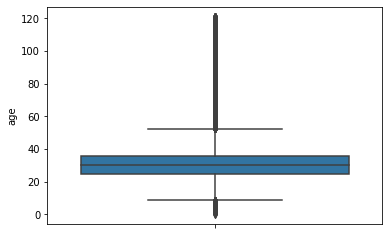

In [38]:
sns.boxplot(df_patient['age'].dropna(),orient='v')

La médiane d'âge est aux alentours de 30 ans, le minimum d'âge est 0, le maximum est aux alentours de 120 ans. Nous pouvons remarquer qu'il s'agit d'une population assez jeune (plus de 75% des patients ont moins de 40 ans)

Sous forme d'histogramme :

<AxesSubplot:xlabel='age'>

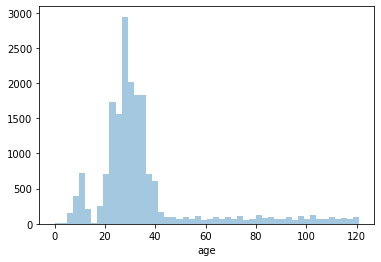

In [39]:
sns.distplot(df_patient['age'].dropna(),kde=False)

Comme on a pu le voir avec le boxplot, la plupart des patients ont entre 20 et 40 ans, avec une petite population qui ont aux alentours de 10 ans, très peu de personnes ont au dessus de 40 ans.

Pour les numéros de téléphones et le complément d'adresse, nous estimons que ce sont des informations qui sont peu pertinentes, nous ne faisons donc pas d'analyse sur ces variables.

## b. Analyse bivariée

Cette fois, nous allons voir comment les différentes variables influent sur notre variable pcr, nous affichons d'abord la distribution de la variable pcr dans le dataset :

In [40]:
pcr = df_patient['pcr'].value_counts().reset_index().rename({'pcr':'count','index':'pcr'},axis=1)
pcr.loc[2] = ['Unknown',df_patient.shape[0]-(pcr.loc[0,'count']+pcr.loc[1,'count'])]
pcr

,pcr,count
0,N,6386
1,P,2090
2,Unknown,10469


<AxesSubplot:xlabel='pcr', ylabel='count'>

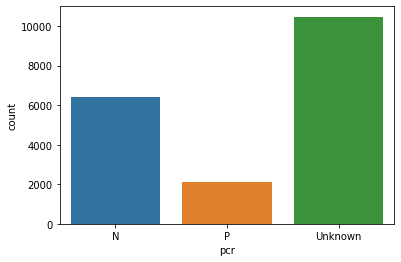

In [41]:
pcr_barplot = sns.barplot(data=pcr,x='pcr',y='count')
pcr_barplot

Nous pouvons voir que la moitié des patients ont un diagnostic inconnu, environ 6000 patients sont des cas négatifs, et environ 2000 positifs.

Sous forme de proportions :

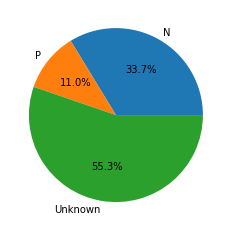

In [42]:
import matplotlib.pyplot as plt

fig1, ax1 = plt.subplots()
ax1.pie(pcr['count']/sum(pcr['count'])*100, labels=pcr['pcr'], autopct='%1.1f%%')

plt.show()

Nous allons maintenant nous intéresser à la relation entre la variable `pcr` et le reste des variables qui sont les plus pertinentes.

> Note : A partir de maintenant, nous allons considérer que les cas positifs et négatifs, en ignorant les cas à NaN.

- **address_1 :**

L'idée ici est de voir quelles adresses contiennent le plus de cas positifs ou négatifs :

In [43]:
addr_pcr = df_patient.groupby(['address_1','pcr']).count()['patient_id'].reset_index()
addr_pcr

,address_1,pcr,patient_id
0,a'beckett street,N,3
1,a'beckett street,P,1
2,abbott street,N,1
3,abbott street,P,1
4,abercorn crescent,N,1
...,...,...,...
4174,zeitz court,N,2
4175,zeitz court,P,1
4176,zox circuit,N,4
4177,zox circuit,P,1


Les adresses contenant le plus grand nombre de cas positifs (Pour des raisons de lisibilité, nous affichons uniquement les 20 adresses avec le plus de cas positifs):

In [44]:
most_sick_address = addr_pcr[addr_pcr['pcr']=='P'].sort_values(by='patient_id',ascending=False)[:20]
most_sick_address = most_sick_address.append(addr_pcr[(addr_pcr['pcr']=='N')&(addr_pcr['address_1'].isin(most_sick_address['address_1']))])
most_sick_address

,address_1,pcr,patient_id
2969,newman morris circuit,P,8
3467,shackleton circuit,P,8
630,burkitt street,P,8
57,allchin circuit,P,7
314,beasley street,P,7
2041,jackie howe crescent,P,6
2922,namatjira drive,P,6
1001,cromwell circuit,P,6
2116,julia flynn avenue,P,5
474,bonney street,P,5


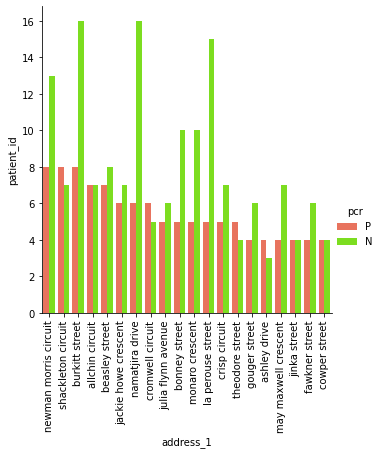

In [45]:
pcr_barplot = sns.catplot(data=most_sick_address,x='address_1',y='patient_id',hue='pcr',kind='bar',palette=['tomato','lawngreen'])
pcr_barplot.set_xticklabels(rotation=90)
pcr_barplot

Nous pouvons voir que les adresses `newman morris circuit`, `shackleton circuit` et `burkitt street` contiennent le plus grand nombre de cas positifs.

Nous affichons les adresses les plus touchées sur une carte :

In [46]:
most_sick_address = addr_pcr[addr_pcr['pcr']=='P'].sort_values(by='patient_id',ascending=False)[:100]
most_sick_address

,address_1,pcr,patient_id
2969,newman morris circuit,P,8
3467,shackleton circuit,P,8
630,burkitt street,P,8
57,allchin circuit,P,7
314,beasley street,P,7
...,...,...,...
1067,damala street,P,3
3396,sampson close,P,3
2571,marsden street,P,3
3529,slessor crescent,P,3


In [47]:
addresses_loc = [get_geolocalisation_from_address(a) for a in most_sick_address['address_1']]
addresses_loc

[[-35.4038428, 149.078085],
 [-35.36604055, 149.1029707707899],
 [-27.240962, 153.0401134],
 [-35.3759855, 149.04248230965715],
 [-26.7346244, 150.6402936],
 [-35.407778, 149.1325229],
 [-33.5006951, 151.4186906],
 [-35.4284553, 149.0873798],
 [-35.368916, 149.1115885],
 [-26.6373629, 152.959321],
 [-27.3997796, 152.9389711],
 [-33.7950461, 151.2702586],
 [-35.2463154, 149.0765757],
 [-33.8581536, 151.1763321],
 [-34.9305618, 138.5913903],
 [-35.4128181, 149.1024863],
 [-35.4146536, 149.1371121],
 [-12.3627897, 130.8837268],
 [-41.4326136, 147.1471349],
 [-32.9176546, 151.7590547],
 [-35.2755377, 149.1337709],
 [-35.2548291, 149.0847975],
 [-35.4716403, 149.0869682],
 [-35.3585538, 149.0602286],
 [-33.7004813, 151.1205634],
 [-42.40202, 145.28814],
 [-33.8957459, 151.2482784],
 [-33.8742909, 151.1929297],
 [-35.3503135, 149.0811138],
 [-35.4267149, 149.0740675],
 [-35.25355, 149.0605926],
 [-23.8967704, 151.2472518],
 [-17.15653, 145.8608805],
 [-35.281005, 149.1375631],
 [-35.2916655,

In [48]:
most_sick_address['latitude'] = [x[0] for x in addresses_loc]
most_sick_address['longitude'] = [x[1] for x in addresses_loc]
most_sick_address

,address_1,pcr,patient_id,latitude,longitude
2969,newman morris circuit,P,8,-35.403843,149.078085
3467,shackleton circuit,P,8,-35.366041,149.102971
630,burkitt street,P,8,-27.240962,153.040113
57,allchin circuit,P,7,-35.375985,149.042482
314,beasley street,P,7,-26.734624,150.640294
...,...,...,...,...,...
1067,damala street,P,3,-35.349357,149.057161
3396,sampson close,P,3,-31.984111,116.062818
2571,marsden street,P,3,-33.887077,151.179853
3529,slessor crescent,P,3,-35.218559,149.076227


In [49]:
m = folium.Map(location=[-25.7826082, 132.8062299],zoom_start=4.4)
most_sick_address.apply(lambda x:folium.CircleMarker(location=[x["latitude"], x["longitude"]],fill=True,fill_opacity=0.5,color='red',radius=x['patient_id']*5).add_to(m), axis=1)
m

Les adresses avec le plus grand nombre de cas se situent principalement à l'est et au sud ouest de l'australie.

- **suburb :**

Comme pour l'adresse, nous allons d'abord regarder quelles banlieues contiennent le plus de cas :

In [50]:
suburb_pcr = df_patient.groupby(['suburb','pcr']).count()['patient_id'].reset_index()
suburb_pcr

,suburb,pcr,patient_id
0,abbotsford,N,7
1,abbotsford,P,1
2,acacia ridge,N,4
3,acacia ridge,P,2
4,acland,N,1
...,...,...,...
2893,young,N,11
2894,young,P,4
2895,yowie bay,N,2
2896,yunderup,N,1


In [51]:
most_sick_suburb = suburb_pcr[suburb_pcr['pcr']=='P'].sort_values(by='patient_id',ascending=False)[:20]
most_sick_suburb = most_sick_suburb.append(suburb_pcr[(suburb_pcr['pcr']=='N')&(suburb_pcr['suburb'].isin(most_sick_suburb['suburb']))])
most_sick_suburb

,suburb,pcr,patient_id
2565,toowoomba,P,20
1014,frankston,P,14
2104,port macquarie,P,12
1610,maryborough,P,11
454,bundaberg,P,10
1994,paddington,P,10
2534,thornbury,P,10
415,broken hill,P,9
2180,ringwood,P,9
1803,murray bridge,P,9


Et enfin nous affichons les banlieues avec le plus grand nombre de cas positifs, à côté des cas négatifs :

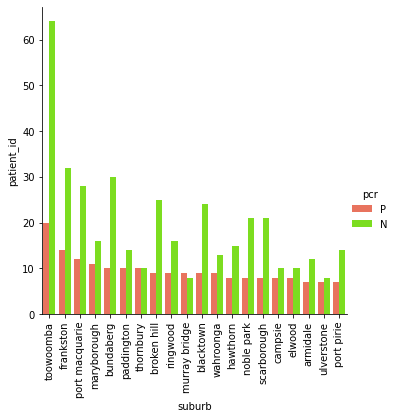

In [52]:
pcr_barplot = sns.catplot(data=most_sick_suburb,x='suburb',y='patient_id',hue='pcr',kind='bar',palette=['tomato','lawngreen'])
pcr_barplot.set_xticklabels(rotation=90)
pcr_barplot

Les banlieus de `toowoomba` contient le plus grand nombre de cas positifs (avec aussi beaucoup de cas négatifs), suivie de `frankston` et `port macquarie`

Nous affichons les banlieues les plus touchées sur une carte :

In [53]:
most_sick_suburb = suburb_pcr[suburb_pcr['pcr']=='P'].sort_values(by='patient_id',ascending=False)[:100]
most_sick_suburb

,suburb,pcr,patient_id
2565,toowoomba,P,20
1014,frankston,P,14
2104,port macquarie,P,12
1610,maryborough,P,11
454,bundaberg,P,10
...,...,...,...
577,chelsea heights,P,4
706,corio,P,4
680,coolbellup,P,4
689,coombabah,P,4


In [54]:
suburb_loc = [get_geolocalisation_from_suburb(a) for a in most_sick_suburb['suburb']]
suburb_loc

[[-27.5610193, 151.953351],
 [-38.150634999999994, 145.14244286734106],
 [-31.4299499, 152.9103525],
 [-25.537583, 152.7019182],
 [-24.8653253, 152.3516785],
 [-33.8841572, 151.2272766],
 [-37.7549944, 144.9985944],
 [-31.965, 141.4511111],
 [-37.8159197, 145.2289042],
 [-35.200095649999994, 139.21709202031087],
 [-33.7401885, 150.86483553289474],
 [-33.720367, 151.1142463],
 [-37.8244246, 145.0317207],
 [-37.9663213, 145.1758464],
 [-31.8959841, 115.7592114],
 [-33.9143894, 151.1032133],
 [-37.8788568, 144.9855487],
 [-30.5144881, 151.6656564],
 [-41.1571818, 146.1705057],
 [-33.36470545, 138.06638066912524],
 [-27.4942385, 153.0771926],
 [-37.7919518, 145.0842372],
 [-27.4654745, 153.0461335],
 [-37.9081962, 144.9957991],
 [-31.8941978, 115.8714367],
 [-31.8695832, 115.9374824],
 [-27.5147784, 153.1268563],
 [-37.8180423, 145.1928735],
 [-30.2962407, 153.1135293],
 [-36.0507987, 146.9336621],
 [-28.02077, 153.3683962],
 [-27.7159492, 153.2022293],
 [-33.8545702, 151.0255673],
 [-33.8

In [55]:
most_sick_suburb['latitude'] = [x[0] for x in suburb_loc]
most_sick_suburb['longitude'] = [x[1] for x in suburb_loc]
most_sick_suburb

,suburb,pcr,patient_id,latitude,longitude
2565,toowoomba,P,20,-27.561019,151.953351
1014,frankston,P,14,-38.150635,145.142443
2104,port macquarie,P,12,-31.429950,152.910352
1610,maryborough,P,11,-25.537583,152.701918
454,bundaberg,P,10,-24.865325,152.351678
...,...,...,...,...,...
577,chelsea heights,P,4,-38.040840,145.134135
706,corio,P,4,-38.074088,144.358648
680,coolbellup,P,4,-32.082201,115.807571
689,coombabah,P,4,-27.905842,153.372259


In [56]:
m = folium.Map(location=[-25.7826082, 132.8062299],zoom_start=4.4)
most_sick_suburb.apply(lambda x:folium.CircleMarker(location=[x["latitude"], x["longitude"]],fill=True,fill_opacity=0.5,color='red',radius=x['patient_id']*2).add_to(m), axis=1)
m

Nous remarquons que les banlieues se trouvant à l'est sont les plus touchées, suivies par des clusters au sud est du pays.

- **state :**

Comme pour l'adresse, nous allons d'abord regarder quels états contiennent le plus de cas :

In [57]:
state_pcr = df_patient.groupby(['state','pcr']).count()['patient_id'].reset_index()
state_pcr

,state,pcr,patient_id
0,act,N,89
1,act,P,30
2,ai,N,1
3,naw,N,1
4,ndw,N,1
5,ns,N,1
6,nsd,N,1
7,nse,N,1
8,nsg,N,1
9,nss,P,1


Nous gardons uniquement les lignes pour lesquelles il y'a un nombre de malade supérieur à 5 (les autres étant des typos) :

In [58]:
most_sick_states = state_pcr[(state_pcr['pcr']=='P')&(state_pcr['patient_id']>=5)].sort_values(by='patient_id',ascending=False)
most_sick_states = most_sick_states.append(state_pcr[(state_pcr['pcr']=='N')&(state_pcr['state'].isin(most_sick_states['state']))])
most_sick_states

,state,pcr,patient_id
11,nsw,P,613
39,vic,P,495
23,qld,P,369
45,wa,P,184
29,sa,P,128
33,tas,P,55
1,act,P,30
17,nt,P,5
0,act,N,89
10,nsw,N,1896


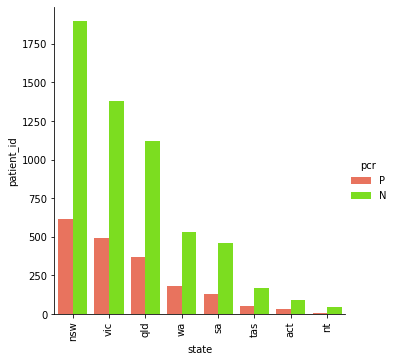

In [59]:
pcr_barplot = sns.catplot(data=most_sick_states,x='state',y='patient_id',hue='pcr',kind='bar',palette=['tomato','lawngreen'])
pcr_barplot.set_xticklabels(rotation=90)
pcr_barplot

Les états de `nsw`,`vic` et `qld` sont les plus touchés, avec néamoins beaucoup de cas négatifs. Il serait aussi intéressant de voir la proportion de cas positifs/négatifs :

In [60]:
most_sick_states['perc'] = [x['patient_id']/sum(most_sick_states[most_sick_states['state']==x['state']]['patient_id']) for i,x in most_sick_states.iterrows()]
most_sick_states = most_sick_states.sort_values(by='state')
most_sick_states

,state,pcr,patient_id,perc
1,act,P,30,0.252101
0,act,N,89,0.747899
11,nsw,P,613,0.244320
10,nsw,N,1896,0.755680
17,nt,P,5,0.096154
16,nt,N,47,0.903846
23,qld,P,369,0.247319
22,qld,N,1123,0.752681
29,sa,P,128,0.218430
28,sa,N,458,0.781570


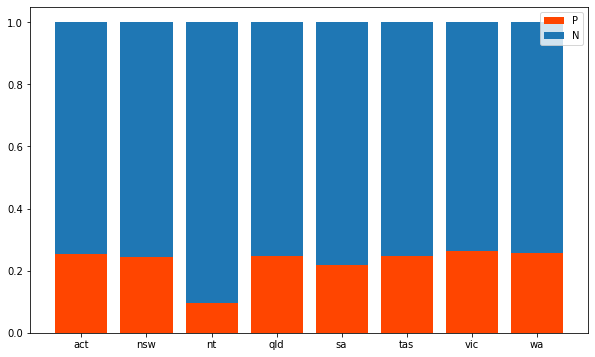

In [61]:
ind = np.arange(len(most_sick_states['state'].unique()))
plt.figure(figsize=(10, 6))
p1 = plt.bar(ind, most_sick_states[most_sick_states['pcr']=='P']['perc'],color='orangered')
p2 = plt.bar(ind, most_sick_states[most_sick_states['pcr']=='N']['perc'],bottom=most_sick_states[most_sick_states['pcr']=='P']['perc'])
plt.xticks(ind, most_sick_states['state'].unique())
plt.legend((p1[0], p2[0]), ('P', 'N'))
plt.show()

Nous pouvons remarquer que malgré un nombre de cas moins élevé, les états `vic` et `wa` possèdent la plus grande proportion de malades. L'état `nt` possède quant à lui la plus faible proportion de malades.

Il est aussi intéressant de voir s'il existe une relation de dépendance entre les deux variables state et pcr, nous construisons donc une table de contingence : 

In [62]:
states_to_keep = df_patient['state'].value_counts().reset_index()
states_to_keep = states_to_keep[states_to_keep['state']>5]
df_patient_cross = df_patient[(~pd.isna(df_patient['state']))&(~pd.isna(df_patient['pcr']))&(df_patient['state'].isin(states_to_keep['index']))][['state','pcr']]
state_pcr_contingency = pd.crosstab(df_patient_cross['pcr'],df_patient_cross['state'])
state_pcr_contingency

state,act,nsw,nt,qld,sa,tas,vic,wa
pcr,,,,,,,,
N,89,1896,47,1123,458,167,1378,532
P,30,613,5,369,128,55,495,184


Puis nous réalisons un test du Chi 2 :

In [63]:
from scipy.stats import chi2_contingency

In [64]:
chi2, p_value, deg_free, expected_freq = chi2_contingency(state_pcr_contingency)
p_value

0.09008153119286856

Nous obenons une p-value de 0.09. Avec un alpha à 0.05, nous considérons l'hypothèse nulle (state et pcr sont indépendants) comme étant vraie. C'est à dire que la connaissance de l'état ne nous permet pas de déterminer si le patient est positif ou négatif et vice-versa.

Nous allons maintenant afficher ces données sur une carte :

In [65]:
most_sick_states = most_sick_states[most_sick_states['pcr']=='P']

In [66]:
state_loc = [get_geolocalisation_from_state(a) for a in most_sick_states['state']]
state_loc

[[-35.4883502, 149.0026942],
 [-31.8759835, 147.2869493],
 [-19.8516101, 133.2303375],
 [-22.1646782, 144.5844903],
 [-30.5343665, 135.6301212],
 [-42.035067, 146.6366887],
 [-36.5986096, 144.6780052],
 [-25.2303005, 121.0187246]]

In [67]:
most_sick_states['latitude'] = [x[0] for x in state_loc]
most_sick_states['longitude'] = [x[1] for x in state_loc]
most_sick_states

C:\Users\Samy\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\Samy\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,state,pcr,patient_id,perc,latitude,longitude
1,act,P,30,0.252101,-35.488350,149.002694
11,nsw,P,613,0.244320,-31.875984,147.286949
17,nt,P,5,0.096154,-19.851610,133.230337
23,qld,P,369,0.247319,-22.164678,144.584490
29,sa,P,128,0.218430,-30.534367,135.630121
33,tas,P,55,0.247748,-42.035067,146.636689
39,vic,P,495,0.264282,-36.598610,144.678005
45,wa,P,184,0.256983,-25.230300,121.018725


In [68]:
m = folium.Map(location=[-25.7826082, 132.8062299],zoom_start=4.4)
most_sick_states.apply(lambda x:folium.CircleMarker(location=[x["latitude"], x["longitude"]],fill=True,fill_opacity=0.5,color='red',radius=x['patient_id']/10).add_to(m), axis=1)
m

Encore une fois, les états au sud est et à l'est sont les plus touchées, ainsi que l'état de queensland (au nord est).

- **age :**

Nous allons maintenant nous intéresser à l'influence de la variable âge sur la maladie, nous commençons par un boxplot (en éliminant les valeurs extrêmes pour plus de lisibilité) :

<AxesSubplot:xlabel='pcr', ylabel='age'>

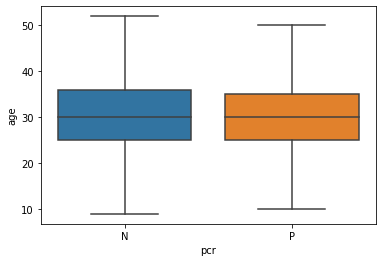

In [69]:
sns.boxplot(data=df_patient,x="pcr", y="age",showfliers=False)

Nous remarquons que l'âge entre les deux groupes suit une repartition quasi-similaire, avec des âges beaucoup moins dispersés pour les personnes testées positives, l'âge médian pour les deux groupes est environ de 30 ans, on le confirme ci-dessous :

In [70]:
df_patient.groupby(['pcr'])['age'].median()

pcr
N    30.0
P    30.0
Name: age, dtype: float64

Nous pouvons également voir que l'âge moyen est quasi-identique :

In [71]:
df_patient.groupby(['pcr'])['age'].mean()

pcr
N    35.647500
P    35.574219
Name: age, dtype: float64

Il serait aussi intéressant de voir les cas positifs/négatifs par tranche d'âge. Pour cela, nous créons des bins à partir de notre variable âge :

In [72]:
age_bins = pd.cut(df_patient['age'],bins=[0,10,20,30,40,50,60,np.inf],right=False)
age_bins

0        [30.0, 40.0)
1        [20.0, 30.0)
2        [30.0, 40.0)
3        [30.0, 40.0)
4        [20.0, 30.0)
             ...     
18940    [20.0, 30.0)
18941    [20.0, 30.0)
18942    [10.0, 20.0)
18943     [60.0, inf)
18944    [30.0, 40.0)
Name: age, Length: 18945, dtype: category
Categories (7, interval[float64]): [[0.0, 10.0) < [10.0, 20.0) < [20.0, 30.0) < [30.0, 40.0) < [40.0, 50.0) < [50.0, 60.0) < [60.0, inf)]

Nous choisissons des tranches par 10, nous considérons les personnes de plus de 60 ans comme une seule classe.

In [73]:
df_patient_bis = df_patient.copy()
df_patient_bis['age_bins'] = age_bins
df_patient_bis

,patient_id,given_name,surname,street_number,address_1,suburb,postcode,state,date_of_birth,age,phone_number,address_2,pcr,age_bins
0,100005,kiana,halley,46.0,mccann street,undercliffe,4210.0,vic,1963-01-18,32.0,07 32322867,NaN,NaN,"[30.0, 40.0)"
1,100015,michael,mcvicar,153.0,mountain circuit,wendouree,3338.0,nsw,1978-09-18,27.0,08 55502793,NaN,NaN,"[20.0, 30.0)"
2,100037,ella,clarke,91.0,NaN,oyster bay,4208.0,vic,1980-04-22,36.0,08 45736238,NaN,N,"[30.0, 40.0)"
3,100064,alexandra,jeffries,9.0,barlow street,joondanna,2617.0,vic,1902-07-24,37.0,08 47796510,NaN,NaN,"[30.0, 40.0)"
4,100126,jayden,clarke,6.0,pennefather street,orange,2904.0,qld,1918-12-10,29.0,03 27525454,lachlan view,NaN,"[20.0, 30.0)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18940,999607,joshua,ryan,105.0,tanumbirini street,mirrabooka,5109.0,sa,1999-02-19,29.0,08 45059414,nareen gardens hostel,NaN,"[20.0, 30.0)"
18941,999684,charlie,hendricks,32.0,david street,yass,4740.0,sa,1935-11-11,29.0,NaN,NaN,NaN,"[20.0, 30.0)"
18942,999751,kierra,godfrey,262.0,macarthur avenue,st ives,3356.0,qld,1949-07-22,19.0,03 61193186,NaN,NaN,"[10.0, 20.0)"
18943,999885,mhary,ulrick,13.0,sonder close,clayton,4744.0,vic,1931-05-09,89.0,07 14497722,NaN,N,"[60.0, inf)"


Nous groupons ensuite nos données par tranche d'âge :

In [74]:
age_pcr = df_patient_bis.groupby(['age_bins','pcr'])['patient_id'].count().reset_index()
age_pcr

,age_bins,pcr,patient_id
0,"[0.0, 10.0)",N,180
1,"[0.0, 10.0)",P,61
2,"[10.0, 20.0)",N,388
3,"[10.0, 20.0)",P,141
4,"[20.0, 30.0)",N,2377
5,"[20.0, 30.0)",P,752
6,"[30.0, 40.0)",N,2222
7,"[30.0, 40.0)",P,755
8,"[40.0, 50.0)",N,250
9,"[40.0, 50.0)",P,72


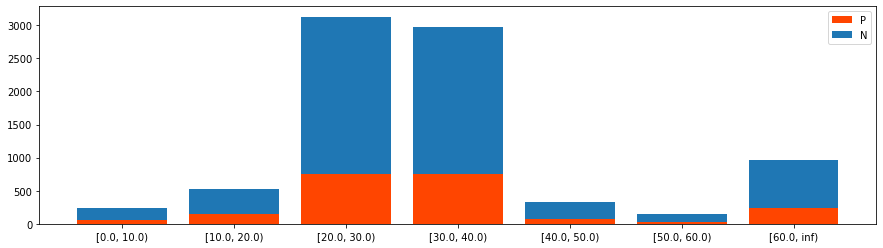

In [75]:
ind = np.arange(len(age_pcr['age_bins'].unique()))
plt.figure(figsize=(15, 4))
p1 = plt.bar(ind, age_pcr[age_pcr['pcr']=='P']['patient_id'],color='orangered')
p2 = plt.bar(ind, age_pcr[age_pcr['pcr']=='N']['patient_id'],bottom=age_pcr[age_pcr['pcr']=='P']['patient_id'])
plt.xticks(ind, age_pcr['age_bins'].unique())
plt.legend((p1[0], p2[0]), ('P', 'N'))
plt.show()

Nous pouvons remarquer que les population entre 20 et 40 ans sont les plus touchées, avec quelques cas ayant entre 10 et 20 ans ou au dessus de 60 ans. Le reste des tranches d'âge possèdent un très petit nombre de cas positifs.

Résultats sous forme de proportion :

In [76]:
age_pcr['perc'] = [x['patient_id']/sum(age_pcr[age_pcr['age_bins']==x['age_bins']]['patient_id']) for i,x in age_pcr.iterrows()]
age_pcr

,age_bins,pcr,patient_id,perc
0,"[0.0, 10.0)",N,180,0.746888
1,"[0.0, 10.0)",P,61,0.253112
2,"[10.0, 20.0)",N,388,0.733459
3,"[10.0, 20.0)",P,141,0.266541
4,"[20.0, 30.0)",N,2377,0.759668
5,"[20.0, 30.0)",P,752,0.240332
6,"[30.0, 40.0)",N,2222,0.746389
7,"[30.0, 40.0)",P,755,0.253611
8,"[40.0, 50.0)",N,250,0.776398
9,"[40.0, 50.0)",P,72,0.223602


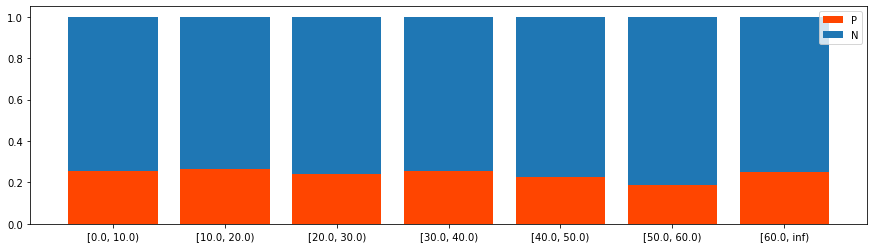

In [77]:
ind = np.arange(len(age_pcr['age_bins'].unique()))
plt.figure(figsize=(15, 4))
p1 = plt.bar(ind, age_pcr[age_pcr['pcr']=='P']['perc'],color='orangered')
p2 = plt.bar(ind, age_pcr[age_pcr['pcr']=='N']['perc'],bottom=age_pcr[age_pcr['pcr']=='P']['perc'])
plt.xticks(ind, age_pcr['age_bins'].unique())
plt.legend((p1[0], p2[0]), ('P', 'N'))
plt.show()

Nous constatons que malgré la différence de nombre de cas, le taux de cas positifs est toujours aux alentours de 20%. Avec un plus grand taux de maladie chez les populations jeunes.

Nous allons maintenant voir s'il existe une relation entre l'attribut `age` et `pcr`, nous cosntruisons d'abord une table de contingence :

In [78]:
df_patient_cross = df_patient_bis[(~pd.isna(df_patient_bis['age_bins']))&(~pd.isna(df_patient_bis['pcr']))][['age_bins','pcr']]
age_pcr_contingency = pd.crosstab(df_patient_cross['pcr'],df_patient_cross['age_bins'])
age_pcr_contingency

age_bins,"[0.0, 10.0)","[10.0, 20.0)","[20.0, 30.0)","[30.0, 40.0)","[40.0, 50.0)","[50.0, 60.0)","[60.0, inf)"
pcr,,,,,,,
N,180,388,2377,2222,250,122,722
P,61,141,752,755,72,28,239


Puis nous réalisons un test du Chi 2 :

In [79]:
chi2, p_value, deg_free, expected_freq = chi2_contingency(age_pcr_contingency)
p_value

0.37188514058571515

On peut voir que la p-value est clairement au dessus de 0.05, nous pouvons dire donc que l'hypothèse nulle est vérifiée (ie l'âge et le pcr sont indépendants)

# 3. Conclusion

Au cours de ce travail, nous avons réalisé les tâches suivantes :
- Détecter les problèmes d'incohérence de données, données manquantes.
- Corriger quelques problèmes liés aux données.
- Proposé trois méthodes de détection de données dupliquées.
- Suppression de ces données dupliquées.
- Analyser les données colonne par colonne
- Proposé plusieurs graphes et cartes afin de visualiser les données.
- Visualiser la relation entre les différents attributs et la maladie.

Nous avons notamment pu voir juste en visualisant les données que la maladie affectait des populations présentes dans l'est et le sud est de l'Australie. Et que la maladie touchait surtout des populations jeunes